# 道路损坏数据集教程

欢迎使用道路损坏数据集教程。   
在本教程中，我们将会展示：
- 如何下载道路损坏数据集
- 数据集的结构
- 数据集的统计信息
- 如何评估你的结果

# 依赖包
在这篇教程中，你需要安装tensorflow 1.4 (我们推荐使用tensorflow-gpu 1.4)。

It takes only 10 mins if you already prepared CUDA settings, please view [tensorflow website](https://www.tensorflow.org/install/). We recomend [Installing with virtualenv](https://www.tensorflow.org/install/install_linux).
- tensorflow 1.4

# 道路损坏数据集结构
道路损坏数据集包含训练好的模型和标注的图片。    
标注图片的结构与 [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/) 一样。    
- 训练好的模型
    - SSD_inception
    - SSD_mobilenet
- 道路损坏数据集（数据结构与 PASCAL VOC 一样）
    - Adachi（日本东京足立市）
          - JPEGImages : 包含图片
          - Annotations : 包含 xml 文件的标注
          - ImageSets : 包含文本文件的训练或评估图像列表
    - Chiba（日本东京千叶市）
    - Muroran（日本东京室兰市）
    - Ichihara
    - Sumida
    - Nagakute
    - Numazu

# 道路损害类型定义

表1: 我们数据集中的道路损害类型及其定义。

<table border="1">
  <thead>
    <tr>
      <th colspan="3">损害类型</th>
      <th>详细</th>
      <th>类型名称</th>
    </tr>
  </thead>

  <tbody>
    <tr>
      <td rowspan="5">裂缝</td>
      <td rowspan="4">线形裂缝</td>
      <td rowspan="2">纵向</td>
      <td>车辙部分</td>
      <td>D00</td>
    </tr>
    <tr>
      <td>施工接缝部分</td>
      <td>D01</td>
    </tr>
    <tr>
      <td rowspan="2">横向</td>
      <td>等距间隔</td>
      <td>D10</td>
    </tr>
    <tr>
      <td>施工接缝部分</td>
      <td>D11</td>
    </tr>
    <tr>
      <td colspan="2">鳄鱼裂缝</td>
      <td>部分铺装、整体铺装</td>
      <td>D20</td>
    </tr>
    <tr>
      <td colspan="3" rowspan="3">其他损坏</td>
      <td>车辙、颠簸、坑洼、分层</td>
      <td>D40</td>
    </tr>
    <tr>
      <td>十字路口模糊</td>
      <td>D43</td>
    </tr>
    <tr>
      <td>白线模糊</td>
      <td>D44</td>
    </tr>
  </tbody>
</table>

来源：2013年日本JRA（2013）的道路养护和修复指南书。    
*注意*：实际上，车辙、颠簸、坑洞和路面分离是不同类型的路面损坏，但使用图像很难区分这四种类型。因此，它们被归类为一个类别，即D40。

# 好，让我们开始！
# 首先，下载数据集
首先你需要下载并解压数据集和代码。

确保你的磁盘至少有2GB的可用空间。

使用python3.5版本

In [1]:
%pip install seaborn==0.11.2
%pip install opencv-python==3.3.0.10

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/47/c7/348acee81b0cf8eec66b4a71c8cca188f405061cb76cc3f9f72249568a22/scipy-1.5.4-cp36-cp36m-macosx_10_9_x86_64.whl (28.8 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c8/df/7b92d69566df6daf65b7db7c7112130def6cfbdc254c78d8addb80402d95/pandas-1.1.5-cp36-cp36m-macosx_10_9_x86_64.whl (10.2 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/77/bd/a70d352f3c24bd444f3cf182f232cca421de23098fba2cf34df1defa68e6/matplotlib-3.3.4-cp36-cp36m-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/6a/9d/984f87a8d5b28b1d4afc042d8f436a76d6210fb582214f35a0ea1db3be66/numpy-1.19.5-cp36-cp36m-macosx_10_9_x86_64.whl (15.6 MB)
  Using cached https://pypi.tuna.tsinghua.e

In [2]:
%pip install tensorflow==1.4.1

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/74/fd/356ae3fcb46b6189b9a066323af3a766a0a9fa1d425e76ec2b83abbfee32/tensorflow-1.4.1-cp36-cp36m-macosx_10_11_x86_64.whl (39.3 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/46/d3/45da5d8d838ca59ec0b2f3aac8dc41a1f53c920861fb01ae710c19c24027/protobuf-3.19.6-cp36-cp36m-macosx_10_9_x86_64.whl (979 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e9/9f/5845c18f9df5e7ea638ecf3a272238f0e7671e454faa396b5188c6e6fc0a/tensorflow_tensorboard-0.4.0-py3-none-any.whl (1.7 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/63/f6/ccb1c83687756aeabbf3ca0f213508fcfb03883ff200d201b3a4c60cedcc/enum34-1.1.10-py3-none-any.whl (11 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/f3/df/ca72f352e15b6f8ce32b74af029f1189abffb906f7c137501ffe69c98a65/Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/3

In [3]:
import os
import six.moves.urllib as urllib

In [5]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('./data/RoadDamageDataset.tar.gz'):
    url_base = 'https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/Japan/CACAIE2018/RoadDamageDataset.tar.gz'
    urllib.request.urlretrieve(url_base, './data/RoadDamageDataset.tar.gz')
    
    print("Download RoadDamageDataset.tar.gz Done")
    
else:
    print("You have RoadDamageDataset.tar.gz")

You have RoadDamageDataset.tar.gz


In [6]:
if not os.path.exists('./modal/trainedModels.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/trainedModels.tar.gz'
    urllib.request.urlretrieve(url_base, './modal/trainedModels.tar.gz')
    
    print("Download trainedModels.tar.gz Done")
    
else:
    print("You have trainedModels.tar.gz")

You have trainedModels.tar.gz


In [8]:
# this procces may take a few minutes
#!tar -zxf ./data/RoadDamageDataset.tar.gz
#!tar -zxf ./modal/trainedModels.tar.gz

# 数据集统计信息

In [2]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [3]:
base_path = os.getcwd() + '/data/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs对应市镇名称
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

In [4]:
# 全部图片和全部标签的数量
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


<AxesSubplot:>

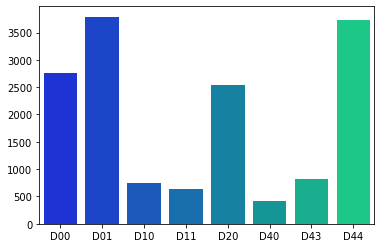

In [5]:
# 每个分类标签的数量
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(x=damageTypes, y=cls_count)

In [6]:
# 每个城市的每个类别标签的数量
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Adachi
# of images：1650
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：467
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：254
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：2145
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：1366
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：2032
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

# 检查数据集里的一些图片

In [7]:
import cv2
import random

In [8]:
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' +image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

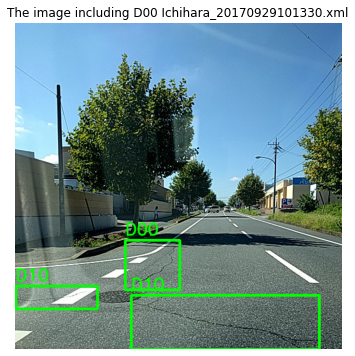

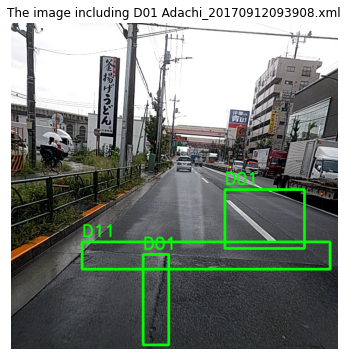

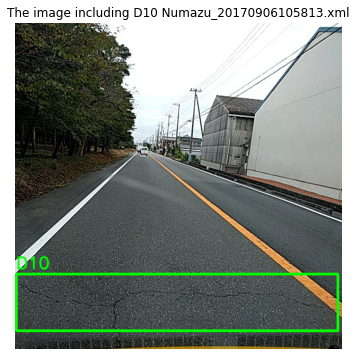

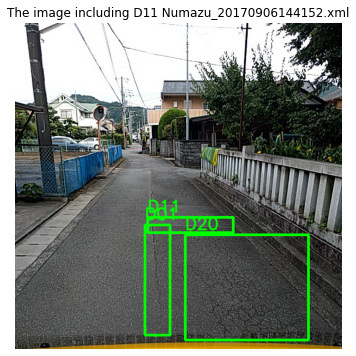

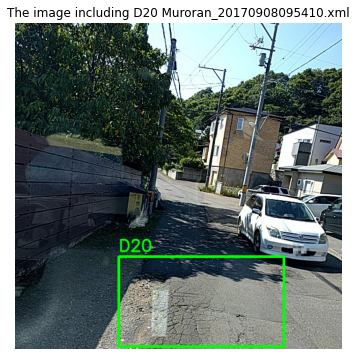

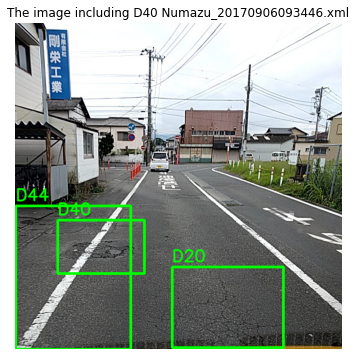

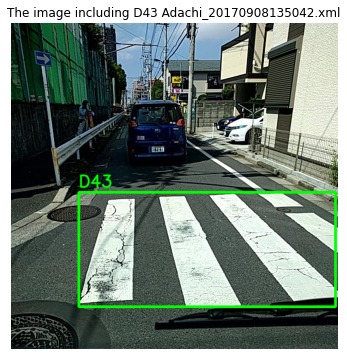

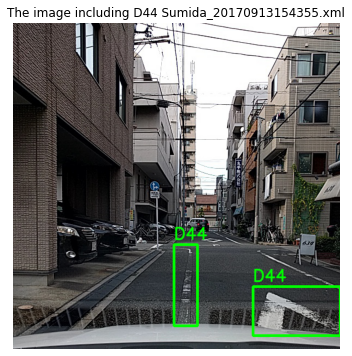

In [9]:
for damageType in damageTypes:
    tmp = []
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')

        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
        
        
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp[0:1]):
        img = draw_images(image)
        plt.subplot(1, 1, number + 1)
        plt.axis('off')
        plt.title('The image including ' + damageType + ' ' + image)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 接下来，使用SSD_mobilenet进行道路损坏检测

# 导入

In [10]:
import numpy as np
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

if tf.__version__ != '1.4.1':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.1!')

/Users/xupengfei/anaconda3/envs/road/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/xupengfei/anaconda3/envs/road/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/xupengfei/anaconda3/envs/road/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/xupengfei/anaconda3/envs/road/lib

## 物体识别导入
以下是物体识别模块的导入

In [11]:
from utils import label_map_util

from utils import visualization_utils as vis_util

# 模型准备
## 变量

只需更改`PATH_TO_CKPT`以指向新的 .pb 文件，即可在此处加载使用`export_inference_graph.py`工具导出的任何模型。

默认情况下，我们在这里使用“SSD with Mobilenet”模型，请参考[检测模型动物园](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md)，了解可以以不同速度和精度开箱即用运行的其他模型的列表。

In [12]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
# PATH_TO_CKPT =  'modal/trainedModels/ssd_mobilenet_innference_graph.pb' 
PATH_TO_CKPT =  'modal/trainedModels/ssd_inception_inference_graph.pb' 

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'crackLabelMap.txt'

NUM_CLASSES = 8

## 加载一个（冻结的）Tensorflow模型到内存中

In [13]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## 加载标签映射表

标签映射将索引映射到类别名称，因此当我们的卷积网络预测出 "5 "时，我们就知道这对应于 "飞机"。在这里，我们使用了内部实用程序函数，但任何能返回将整数映射到适当字符串标签的字典的函数都没问题

In [14]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## 帮助代码

In [15]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# 检测

In [16]:
# get images from val.txt
PATH_TO_TEST_IMAGES_DIR = '/Users/xupengfei/workplace/learn/python/pytorch/RoadDamageDetector/data/RoadDamageDataset/'
D_TYPE = ['D00', 'D01', 'D10', 'D11', 'D20','D40', 'D43']
govs = ['Adachi', 'Ichihara', 'Muroran', 'Chiba', 'Sumida', 'Nagakute', 'Numazu']

val_list = []
for gov in govs:
    file = open(PATH_TO_TEST_IMAGES_DIR + gov + '/ImageSets/Main/val.txt', 'r')
    for line in file:
        line = line.rstrip('\n').split('/')[-1]
        val_list.append(line)
    file.close()

print("# of validation images：" + str(len(val_list)))

# of validation images：1813


In [17]:
TEST_IMAGE_PATHS=[]
random.shuffle(val_list)

for val_image in val_list[0:5]:
    TEST_IMAGE_PATHS.append(PATH_TO_TEST_IMAGES_DIR + val_image.split('_')[0]+ '/JPEGImages/%s.jpg' %val_image)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

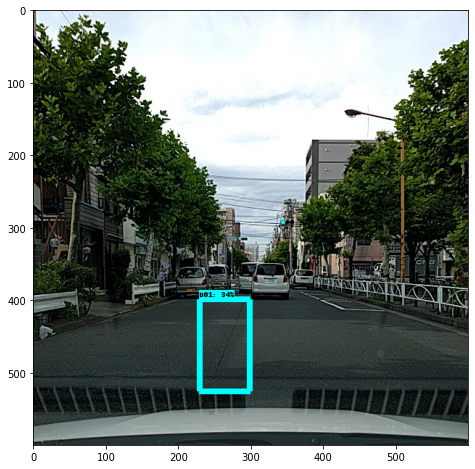

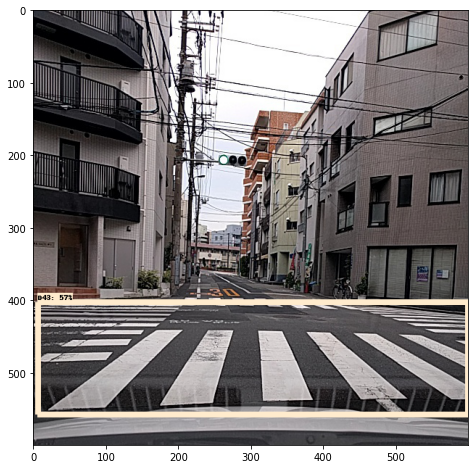

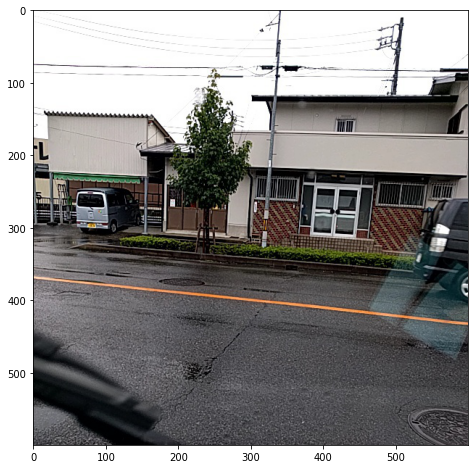

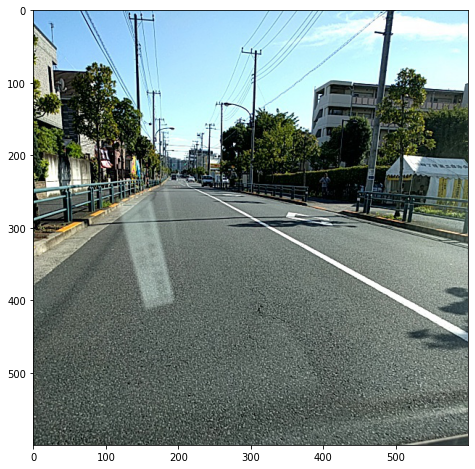

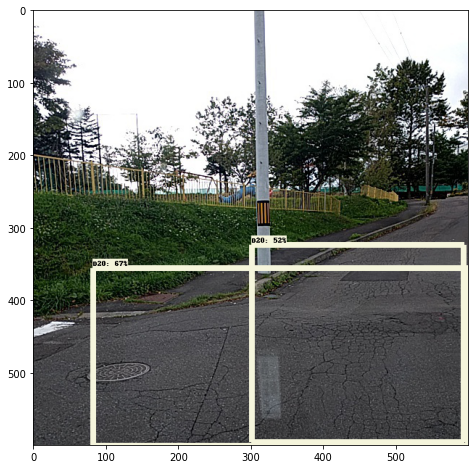

In [22]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          min_score_thresh=0.3,
          use_normalized_coordinates=True,
          line_thickness=8)
      # plt.title('The image including ' + image_path)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)